<a href="https://colab.research.google.com/github/rrhnm/Tugas-Git/blob/main/AI_CNN_Katarak_Optimize_Raihan_Maulana_2255061002_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AI CNN Prediksi Katarak**

**Library ML, CNN, dan Olah Data**

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from google.colab import files
from PIL import Image

import random

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimage
import cv2

from sklearn.model_selection import train_test_split

**Menautkan Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Inisialisasi Direktori Dataset**

In [ ]:
dataset_train = '/content/drive/MyDrive/CNN_Katarak/dataset_katarak/train'
dataset_test = '/content/drive/MyDrive/CNN_Katarak/dataset_katarak/test'

In [ ]:
train_normal =  '/content/drive/MyDrive/CNN_Katarak/dataset_katarak/train/normal'
train_cataract = '/content/drive/MyDrive/CNN_Katarak/dataset_katarak/train/cataract'
test_normal =   '/content/drive/MyDrive/CNN_Katarak/dataset_katarak/test/normal'
test_cataract =  '/content/drive/MyDrive/CNN_Katarak/dataset_katarak/test/cataract'

**Fungsi Preprocess Resize dan Load Image**

<ipython-input-29-fb17237dbd1a>:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(size, Image.ANTIALIAS)


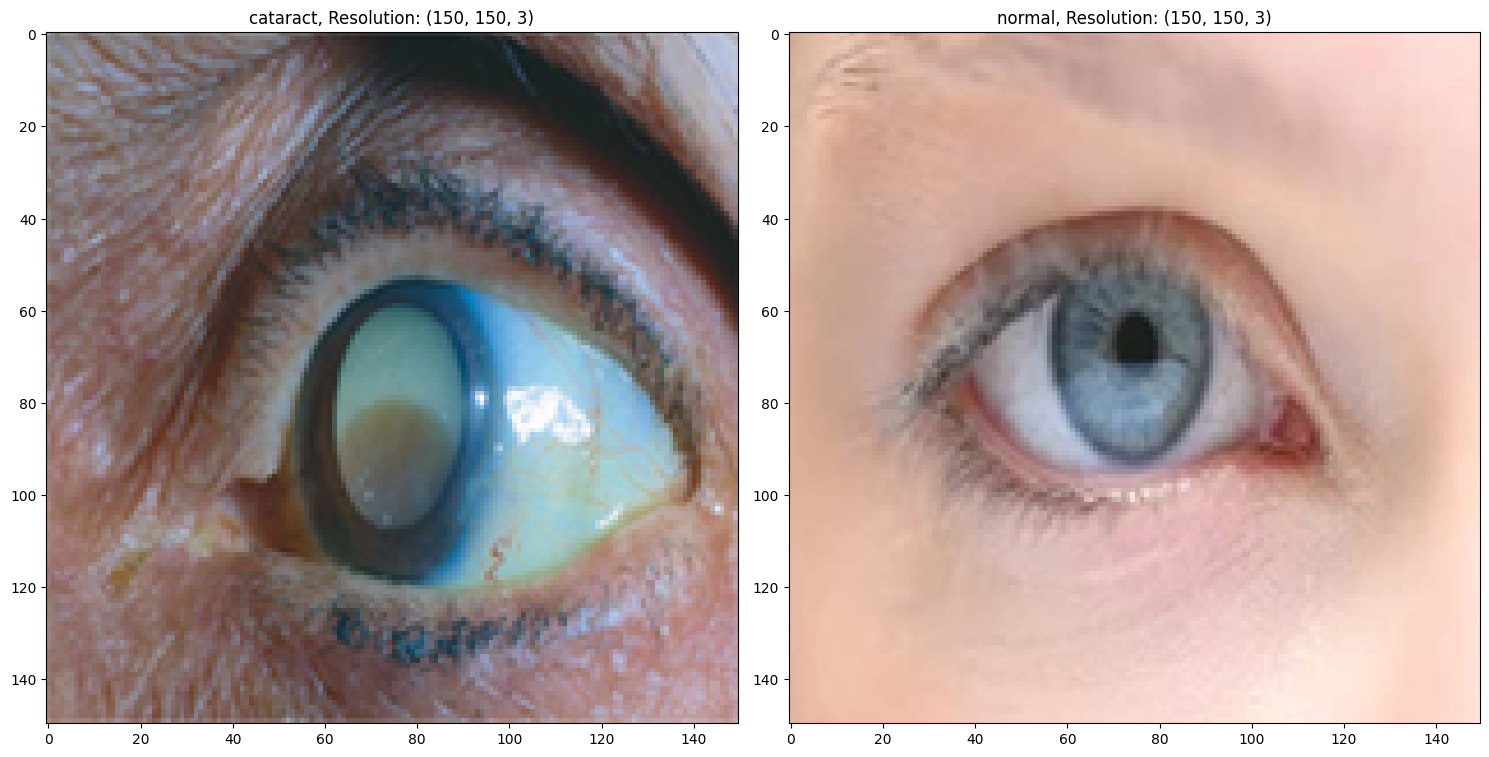

In [ ]:
def resize_image(image_path, size=(150, 150)):
    with Image.open(image_path) as img:
        img = img.resize(size, Image.ANTIALIAS)
        img.save(image_path)

# Fungsi untuk memuat dan menampilkan gambar
def load_and_display_images(dataset_path):
    for filename in os.listdir(dataset_path):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            file_path = os.path.join(dataset_path, filename)
            resize_image(file_path)

            img = Image.open(file_path)

            plt.imshow(img)
            plt.title(filename)
            plt.show()

fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# Cataract
cataract_img_path = '/content/drive/MyDrive/CNN_Katarak/dataset_katarak/train/cataract/image_243.png'
resize_image(cataract_img_path)
cataract_img = mpimage.imread(cataract_img_path)
ax[0].imshow(cataract_img)
ax[0].set_title(f'cataract, Resolution: {cataract_img.shape}')

# Normal
normal_img_path = '/content/drive/MyDrive/CNN_Katarak/dataset_katarak/train/normal/image_243.png'
resize_image(normal_img_path)  # Mengubah ukuran gambar sebelum ditampilkan
normal_img = mpimage.imread(normal_img_path)
ax[1].imshow(normal_img)
ax[1].set_title(f'normal, Resolution: {normal_img.shape}')

plt.tight_layout()
plt.show()

**Total Dataset**

In [ ]:
def load_images_from_directory(directory):
  images = []
  for filename in os.listdir(directory):
    img_path = os.path.join(directory, filename)
    if filename.endswith(('.png', '.jpg', '.jpeg')): # Check image format
      img = cv2.imread(img_path)
      if img is not None:
        images.append(img)
  return images

train_normal_images = load_images_from_directory(train_normal)
train_cataract_images = load_images_from_directory(train_cataract)
test_normal_images = load_images_from_directory(test_normal)
test_cataract_images = load_images_from_directory(test_cataract)

print("Data Normal Train:", len(train_normal_images))
print("Data Cataract Train:", len(train_cataract_images))
print("Data Normal Test:", len(test_normal_images))
print("Data Cataract Test:", len(test_cataract_images))

Data Normal Train: 246
Data Cataract Train: 245
Data Normal Test: 60
Data Cataract Test: 61


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                  horizontal_flip=True,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  zoom_range=0.2,
                                  rotation_range=40,
                                  shear_range=0.2,
                                  fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale = 1/255,
                                  horizontal_flip=True,
                                  vertical_flip=False,
                                  validation_split=0.2)

In [ ]:
print('Training Data:')
train_generator = train_datagen.flow_from_directory(
    dataset_train,
    target_size=(150,150),
    batch_size=4,
    class_mode='binary',
    subset='training'
)

print('Validation Data:')
val_generator = test_datagen.flow_from_directory(
    dataset_test,
    target_size=(150,150),
    batch_size=4,
    class_mode='binary',
    subset='validation'
)

print('Testing Data:')
test_generator = test_datagen.flow_from_directory(
    dataset_test,
    target_size=(150,150),
    batch_size=4,
    class_mode='binary'
)

Training Data:
Found 491 images belonging to 2 classes.
Validation Data:
Found 24 images belonging to 2 classes.
Testing Data:
Found 121 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 17, 17, 128)      

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=30,
    epochs=50,
    validation_data=test_generator,
    validation_steps=5,
    verbose=2,
    callbacks=[tf.keras.callbacks.ModelCheckpoint('simple_model.h5', save_best_only=True, monitor='val_loss')] # Use the ModelCheckpoint callback from Keras
)

Epoch 1/50
30/30 - 13s - loss: 0.3564 - accuracy: 0.8655 - val_loss: 0.4468 - val_accuracy: 0.9000 - 13s/epoch - 444ms/step
Epoch 2/50
30/30 - 9s - loss: 0.4240 - accuracy: 0.7750 - val_loss: 0.4027 - val_accuracy: 0.8500 - 9s/epoch - 310ms/step
Epoch 3/50
30/30 - 12s - loss: 0.3456 - accuracy: 0.8583 - val_loss: 0.2071 - val_accuracy: 0.9000 - 12s/epoch - 397ms/step
Epoch 4/50
30/30 - 14s - loss: 0.3216 - accuracy: 0.8571 - val_loss: 0.2877 - val_accuracy: 0.8000 - 14s/epoch - 453ms/step
Epoch 5/50
30/30 - 15s - loss: 0.3348 - accuracy: 0.8417 - val_loss: 0.4855 - val_accuracy: 0.8000 - 15s/epoch - 504ms/step
Epoch 6/50
30/30 - 15s - loss: 0.3643 - accuracy: 0.8333 - val_loss: 0.2981 - val_accuracy: 0.9000 - 15s/epoch - 505ms/step
Epoch 7/50
30/30 - 13s - loss: 0.3799 - accuracy: 0.8403 - val_loss: 0.4943 - val_accuracy: 0.8000 - 13s/epoch - 449ms/step
Epoch 8/50
30/30 - 10s - loss: 0.3829 - accuracy: 0.8250 - val_loss: 0.4494 - val_accuracy: 0.8500 - 10s/epoch - 343ms/step
Epoch 9/50

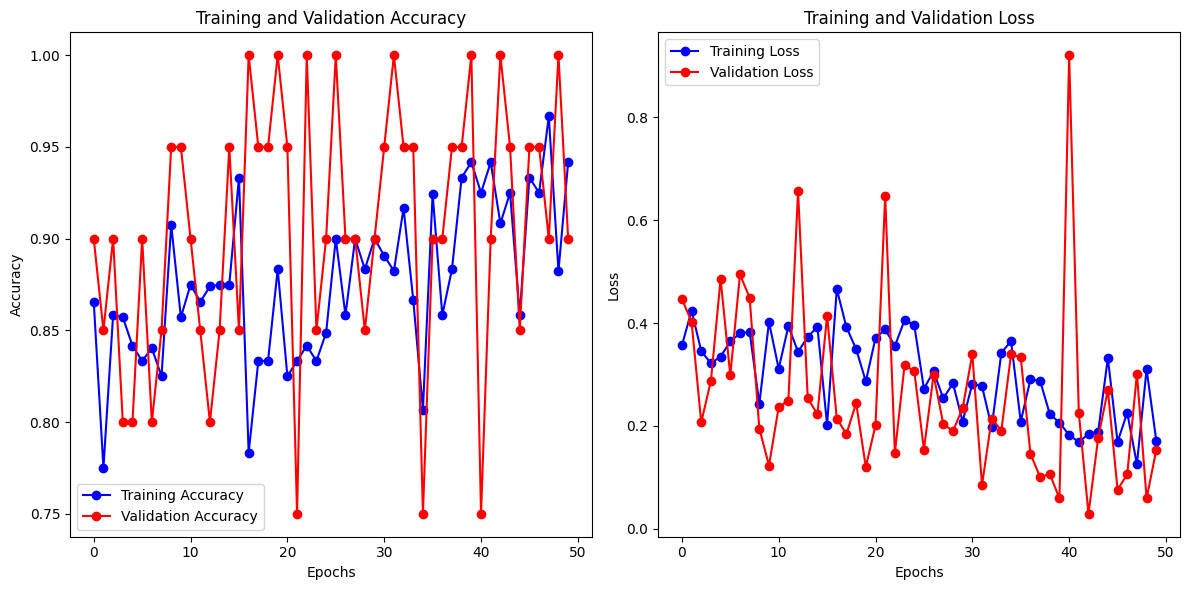

In [ ]:
# Get training and validation accuracy from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get training and validation loss from the history object
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Create a figure with subplots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss with dots
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

31/31 [==============================] - 7s 220ms/step - loss: 0.2134 - accuracy: 0.9504
Test accuracy: 0.9504132270812988


1/1 [==============================] - 0s 36ms/step


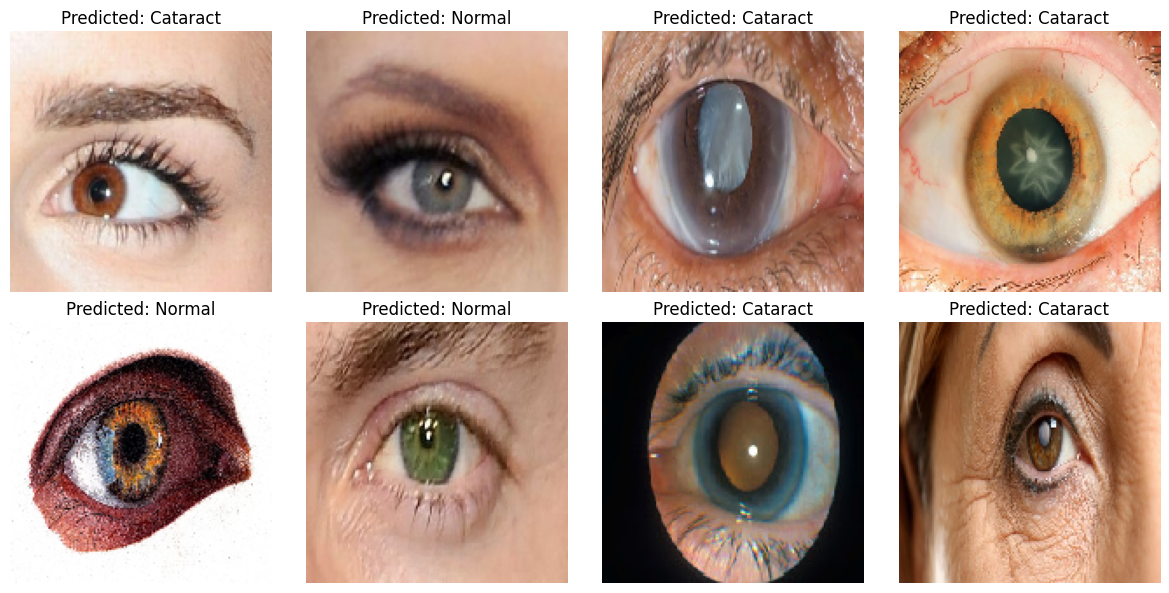

In [ ]:
img_paths = [
    '/content/drive/MyDrive/CNN_Katarak/dataset_katarak/test/normal/image_305.png',
    '/content/drive/MyDrive/CNN_Katarak/dataset_katarak/test/normal/image_272.png',
    '/content/drive/MyDrive/CNN_Katarak/dataset_katarak/test/cataract/image_287.png',
    '/content/drive/MyDrive/CNN_Katarak/dataset_katarak/test/cataract/image_302.png',
    '/content/drive/MyDrive/CNN_Katarak/dataset_katarak/test/normal/image_258.png',
    '/content/drive/MyDrive/CNN_Katarak/dataset_katarak/test/normal/image_296.png',
    '/content/drive/MyDrive/CNN_Katarak/dataset_katarak/test/cataract/image_284.png',
    '/content/drive/MyDrive/CNN_Katarak/dataset_katarak/test/cataract/image_288.png'
    ]

# Create a figure to display images
plt.figure(figsize=(12, 6))

for i, img_path in enumerate(img_paths):
    img = load_img(img_path, target_size=(150, 150))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    predicted_class = "Normal" if prediction > 0.5 else "Cataract"

    plt.subplot(2, 4, i + 1)  # 1 row, 4 columns
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')  # Turn off axis labels

plt.tight_layout()
plt.show()